# <font color="maroon">Prepare Libraries</font>

In [1]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.3MB 731kB/s eta 0:00:01
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1


In [2]:
!pip install missingno

In [3]:
!pip install TextBlob

    100% |████████████████████████████████| 645kB 19.9MB/s ta 0:00:01


In [4]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from IPython.display import display
%matplotlib inline

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000
np.set_printoptions(precision=3)

# <font color="maroon">Read Data</font>

In [6]:
client_4583a2827cdd4084aebc758e0b87cb12.download_file(Bucket=bucket,Key='DataFromNoteBookQ1_cos.pkl',Filename='./DataFromNoteBookQ1_local.pkl')

In [7]:
df_complaint = pd.read_pickle('./DataFromNoteBookQ1_local.pkl')
df_complaint.shape

(1895752, 18)

In [8]:
df_complaint['borough'].value_counts()

BRONX            520749
BROOKLYN         499784
MANHATTAN        366900
Unspecified      282917
QUEENS           209539
STATEN ISLAND     15863
Name: borough, dtype: int64

### Given the fact that BRONX has majority of Heating Problems, let us focus there. So we are filtering the data further for the borough BRONX

In [9]:
df_complaint = df_complaint[df_complaint['borough'] == 'BRONX']
df_complaint.shape

(520749, 18)

#### Transformation for data profiling later

In [10]:
import datetime as dt
today=dt.datetime.now().date()
df_complaint['latitude']     =  df_complaint.latitude.str[:6].fillna('00.000').astype(float)
df_complaint['longitude']    =  df_complaint.longitude.str[:7].fillna('-00.000').astype(float)
df_complaint['incident_zip'] =  df_complaint.incident_zip.fillna('00000').astype(int)
df_complaint['process_days'] = (df_complaint['closed_date'] - df_complaint['created_date']).dt.days.fillna((today - df_complaint['created_date']).dt.days).astype(int) 
df_complaint.head(3)

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,open_data_channel_type,resolution_description,status,street_name,unique_key,created_year,created_month,process_days
26,ADDRESS,BRONX,BRONX,2016-12-08 02:19:00,HEAT/HOT WATER,2016-12-05 11:52:54,741 WHITE PLAINS ROAD,10473,40.821,RESIDENTIAL BUILDING,-73.858,ONLINE,The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.,Closed,WHITE PLAINS ROAD,34931883,2016,12,2
31,ADDRESS,BRONX,BRONX,2016-12-08 15:36:34,HEAT/HOT WATER,2016-12-05 06:42:52,1165 GERARD AVENUE,10452,40.834,RESIDENTIAL BUILDING,-73.920,PHONE,"The Department of Housing Preservation and Development was not able to gain access to your apartment or others in the building to inspect for a lack of heat or hot water. The complaint has been closed. If the condition still exists, please file a new complaint.",Closed,GERARD AVENUE,34931894,2016,12,3
40,ADDRESS,BRONX,BRONX,2016-12-05 14:05:04,HEAT/HOT WATER,2016-12-05 08:52:45,190 WEST 170 STREET,10452,40.841,RESIDENTIAL BUILDING,-73.925,PHONE,"The Department of Housing Preservation and Development contacted a tenant in the building and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.",Closed,WEST 170 STREET,34931921,2016,12,0


#### Data Profiling for entire dataset for Heating Complaint for Bronx

In [11]:
!pip install pandas-profiling 

In [12]:
import pandas_profiling
p = pandas_profiling.ProfileReport(df_complaint)
p

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/conda/envs/DSX-Python35/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/envs/DSX-Python35/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipyker

Number of variables,20
Number of observations,520749
Total Missing (%),0.1%
Total size in memory,79.5 MiB
Average record size in memory,160.0 B
Numeric,6
Categorical,7
Boolean,0
Date,2
Text (Unique),0
Rejected,5


### From the above profiling it is clear enough that the high number of Heating Complaints in Bronx are happening in certain pockets of zip code, streets and addresses

#### Let us also do profiling of Heating Complaints in Bronx in recent year 2017

In [13]:
df_complaint_2017 = df_complaint[df_complaint['created_year'] == 2017]

In [14]:
p2017 = pandas_profiling.ProfileReport(df_complaint_2017)
p2017

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/font_man

Number of variables,20
Number of observations,68718
Total Missing (%),0.0%
Total size in memory,10.5 MiB
Average record size in memory,160.0 B
Numeric,5
Categorical,6
Boolean,0
Date,2
Text (Unique),0
Rejected,7


#### Based on these two profiling it is obvious that three Streets - GRAND CONCOURSE, BOYNTON AVENUE, and MORRIS AVENUE is having Top 3 highest number of complaints both in last 5 years and in 2017

In [15]:
df_top_zip_5yr = df_complaint.groupby(['incident_zip'], as_index=False).agg({'unique_key':'count'})
df_top_zip_5yr.columns = ["zip","cnt"]
df_top_zip_5yr.sort_values(['cnt'],ascending=False).head(10)

,zip,cnt
8,10458,49358
17,10467,49119
18,10468,43435
3,10453,42867
2,10452,37059
7,10457,33362
6,10456,32994
12,10462,30548
13,10463,27047
22,10472,26486


In [16]:
df_top_zip_2017 = df_complaint_2017.groupby(['incident_zip'], as_index=False).agg({'unique_key':'count'})
df_top_zip_2017.columns = ["zip","cnt"]
df_top_zip_2017.sort_values(['cnt'],ascending=False).head(10)

,zip,cnt
8,10458,6707
17,10467,6041
3,10453,5822
18,10468,5371
2,10452,5009
6,10456,4576
12,10462,4548
7,10457,4408
22,10472,4291
10,10460,3468


#### Based on above two tables it is clear that the Zip codes 10458,10467, 10453,10468, 10452 are the top 5 Zip codes having highest number of Heating Complaints in last 5 years as well as in recent 2017

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


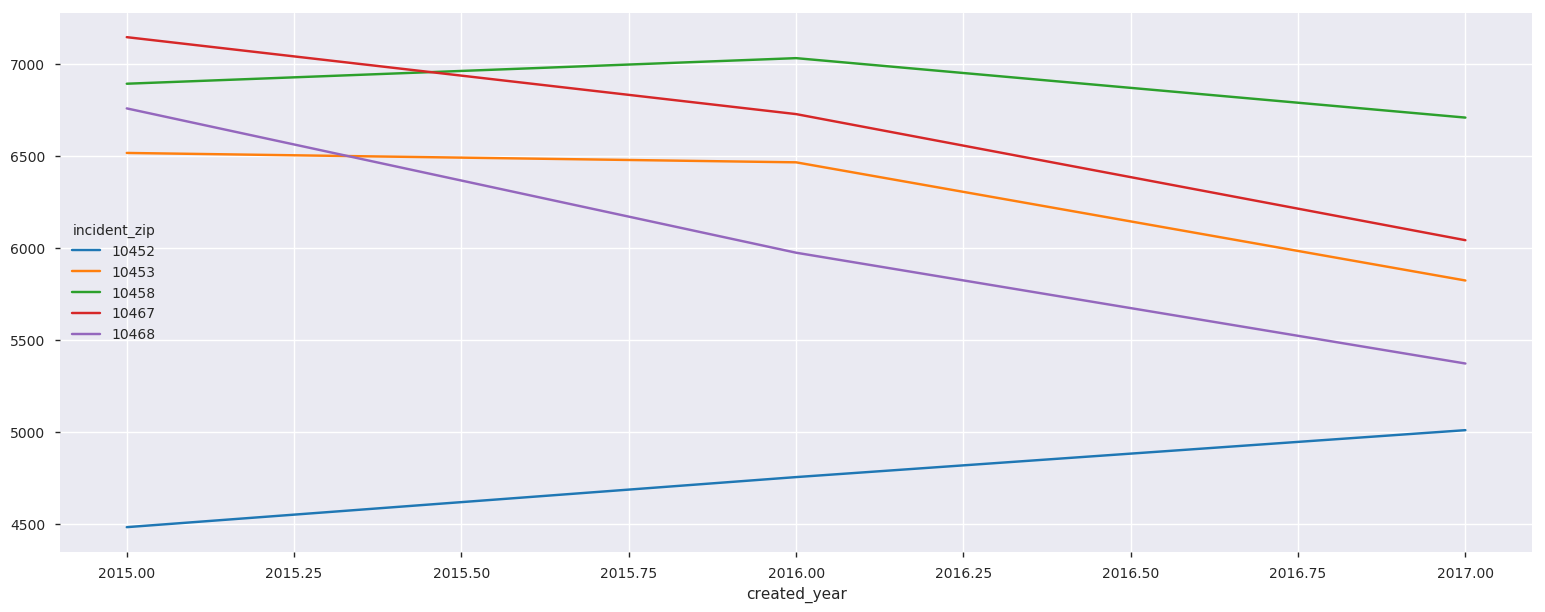

In [17]:
fig, ax = plt.subplots(figsize=(19,7))
df_complaint[df_complaint['created_year'].isin([2017,2016,2015]) & df_complaint['incident_zip'].isin([10458,10467, 10453,10468, 10452])]\
.groupby(['created_year', 'incident_zip']).count()['unique_key'].unstack().plot(ax=ax)

#### The above plot shows that for these 5 Zip codes number of complaints are increasing for 10452 and number of complaints are highest for 10458. For other 3 zip codes it is reducing but still pretty high. So these 5 Zip Codes are worth further investigation.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


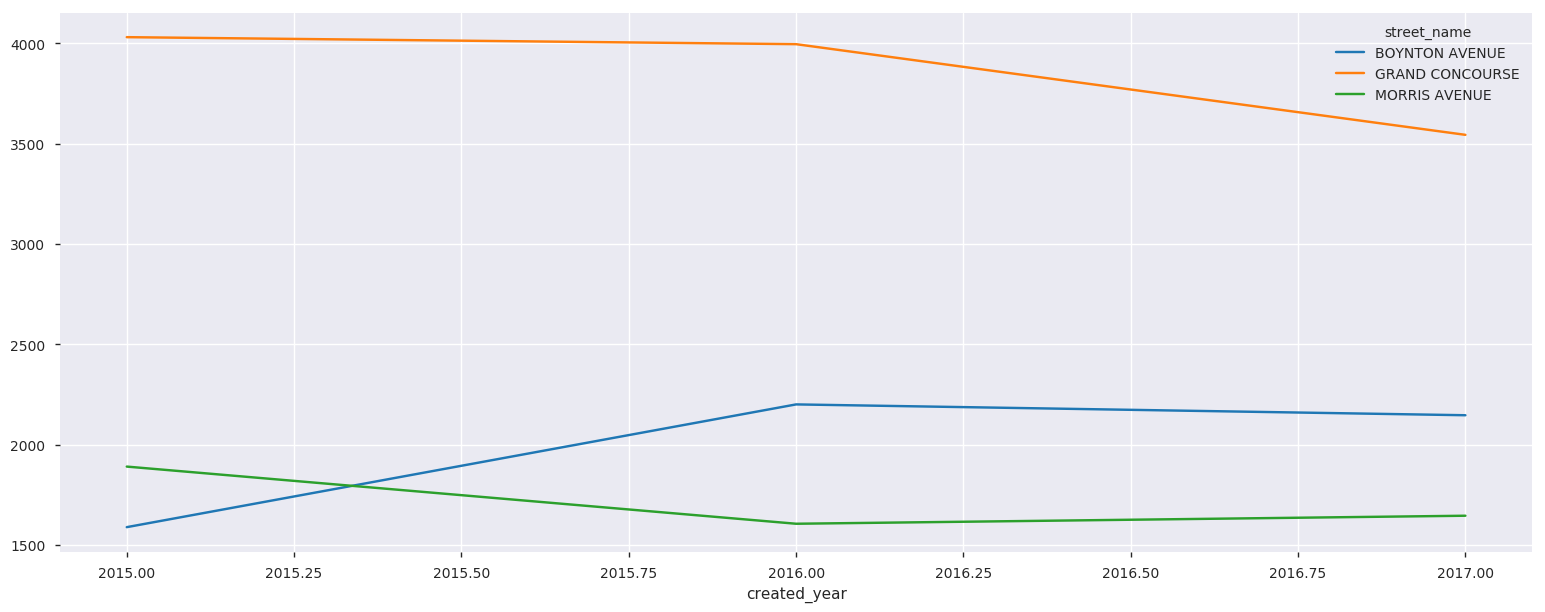

In [18]:
fig, ax = plt.subplots(figsize=(19,7))
df_complaint[df_complaint['created_year'].isin([2017,2016,2015]) & df_complaint['street_name'].isin(['GRAND CONCOURSE','BOYNTON AVENUE', 'MORRIS AVENUE'])]\
.groupby(['created_year', 'street_name']).count()['unique_key'].unstack().plot(ax=ax)

#### The above plot shows that for the above 3 Streets, Boynton Avenue is surely having increasing trend of heating complaints. For Grand Concourse though the number is decreasing but still at high side. So the houses in these 2 Streets surely need attention.

In [19]:
df_heat_addr = df_complaint[df_complaint['created_year']==2017].groupby(['incident_address','latitude','longitude','incident_zip'],as_index=False).\
    agg({"unique_key":"count"}) 
df_heat_addr.columns = ["addr","lat","lng","zip","cnt"]
df_addr_2017 = df_heat_addr[df_heat_addr['cnt']>0][['addr','lat','lng','zip', 'cnt']].sort_values(by='cnt', ascending=False).head(10)
df_addr_2017

,addr,lat,lng,zip,cnt
106,1025 BOYNTON AVENUE,40.824,-73.877,10472,1484
3116,2090 EAST TREMONT AVENUE,40.841,-73.857,10462,861
124,1030 BOYNTON AVENUE,40.825,-73.877,10472,418
4944,2968 PERRY AVENUE,40.870,-73.884,10458,409
1511,1425 DR M L KING JR BOULEVARD,40.843,-73.924,10452,388
2986,2040 BRONXDALE AVENUE,40.850,-73.866,10462,352
4436,266 BEDFORD PARK BOULEVARD,40.870,-73.886,10458,341
2786,1967 MARMION AVENUE,40.843,-73.886,10460,338
7548,750 GRAND CONCOURSE,40.823,-73.924,10451,313
4808,2856 WEBB AVENUE,40.873,-73.900,10468,278


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


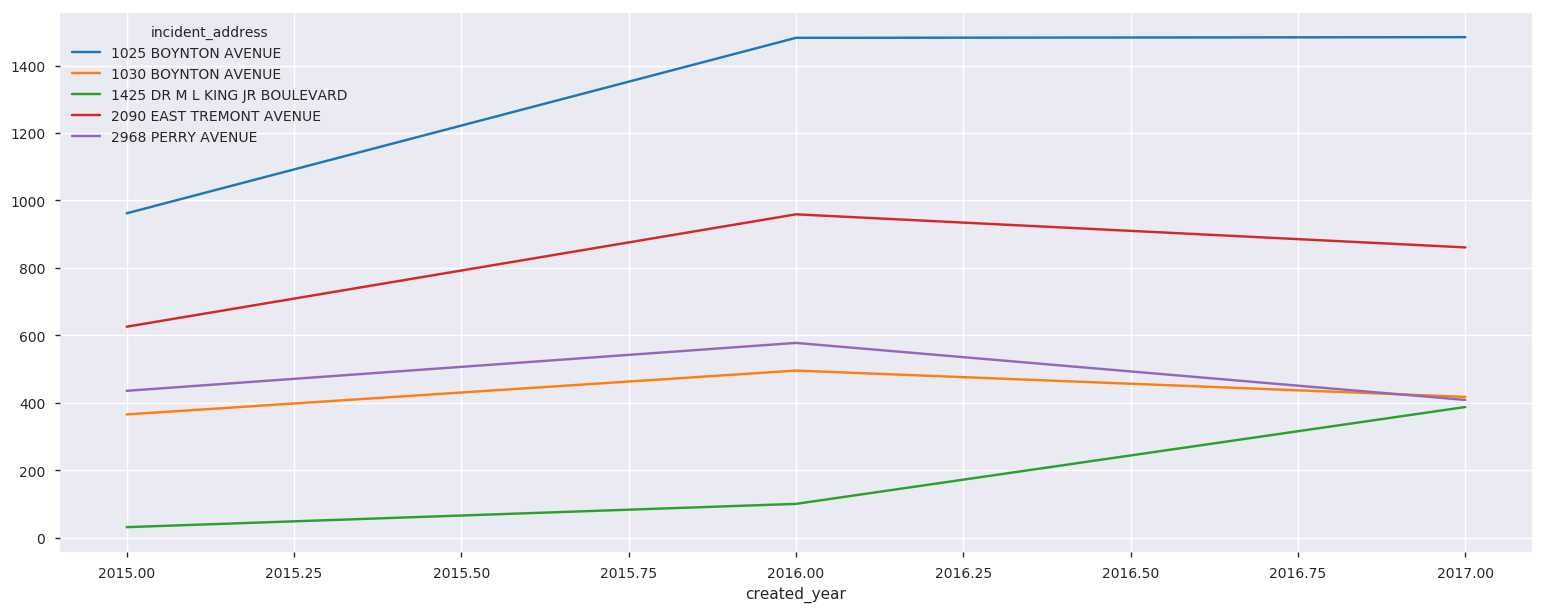

In [20]:
fig, ax = plt.subplots(figsize=(19,7))
df_complaint[df_complaint['created_year'].isin([2017,2016,2015]) & df_complaint['incident_address']\
 .isin(['1025 BOYNTON AVENUE','2090 EAST TREMONT AVENUE', '1030 BOYNTON AVENUE', '2968 PERRY AVENUE', '1425 DR M L KING JR BOULEVARD'])]\
.groupby(['created_year', 'incident_address']).count()['unique_key'].unstack().plot(ax=ax)

### Next we show the 10 addresses with highest number of Heating Complaints in Bronx in a Map

In [21]:
!pip install folium
!pip install geopy

    100% |████████████████████████████████| 92kB 15.8MB/s ta 0:00:01


In [22]:
import folium

In [23]:
def print_map(geoList, n, msg):
    lat, lng, full_addr = geoList[0].split("\t")
    map=folium.Map(location=[float(lat),float(lng)], zoom_start=n, tiles='Stamen Terrain')
    for i in range(0, len(geoList)):
        lat, lng, full_addr = geoList[i].split("\t")
        if not msg:
            folium.Marker([float(lat), float(lng)], popup=full_addr).add_to(map)
        else:
            folium.Marker([float(lat), float(lng)], popup=("<B><font color=maroon>" + msg + "</font></B><BR>" + full_addr)).add_to(map)

    return map

In [24]:
#Due to the dataset is filtered by Bronx, NY in all rows, we are safely fill-in the city and state info in address to locate lat/lng
#df_addr['full_addr'] = df_addr['addr'].map(str) + " Brooklyn, NY " + df_addr['zip'].map(str)
#geoList = get_geo(df_addr)
geoList2017 = []
for idx, row in df_addr_2017.iterrows():
    addr_data = str(row['lat']) + "\t" + str(row['lng']) + "\t" + str(row['addr']) + " " + str(row['zip'])
    geoList2017.append(addr_data)

In [25]:
map = print_map(geoList2017, 15, "2017 Top Complaint Incident Address")
map.save('map1.html')
map

#### These 10 addresses are pretty much well spread out

## Concluding Remarks - Based on the analysis above the Department of Housing Preservation and Development of New York City should the Borough BRONX. Within Bronx the 3 addresses 1025 BOYNTON AVENUE, 2090 EAST TREMONT AVENUE and 1425 DR M L KING JR BOULEVARD. As shown in the Google Map the top 10 addresses where the Hewating Complaints are highest are well spread out. That essentially means focusing on a particular set of zip code may not help

#### Saving the work from this notebook

In [29]:
df_complaint.to_pickle('./DataFromNoteBookQ2.pkl')

In [30]:
client_4583a2827cdd4084aebc758e0b87cb12.upload_file('./DataFromNoteBookQ2.pkl',bucket,'DataFromNoteBookQ2_cos.pkl')